In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com//stedy//Machine-Learning-with-R-datasets//master//insurance.csv")

In [16]:
data['charges'].shape

(1338,)

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'sex' column
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])

# Apply LabelEncoder to 'smoker' column
data['smoker_encoded'] = label_encoder.fit_transform(data['smoker'])

# Apply LabelEncoder to 'region' column
data['region_encoded'] = label_encoder.fit_transform(data['region'])
new_data  = data.drop(['sex' , 'smoker' , 'region'],axis = 1)
new_data['charges'].shape


(1338,)

In [18]:
#Create X& Y values(feature and value)
#Create training and test sets
# Build a neural network (sort of like model_2 above)
X = new_data.drop("charges",axis=1 )
Y = new_data["charges"]
X.shape , Y.shape


((1338, 6), (1338,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X_train), len(Y_train),len(Y_test),len(Y_train)

(1070, 1070, 268, 1070)

In [20]:
X_train

,age,bmi,children,sex_encoded,smoker_encoded,region_encoded
560,46,19.950,2,0,0,1
1285,47,24.320,0,0,0,0
1142,52,24.860,0,0,0,2
969,39,34.320,5,0,0,2
486,54,21.470,3,0,0,1
...,...,...,...,...,...,...
1095,18,31.350,4,0,0,0
1130,39,23.870,5,0,0,2
1294,58,25.175,0,1,0,0
860,37,47.600,2,0,1,3


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Input
#building a model
tf.random.set_seed(42)
#building neurons '
model = Sequential([
  
    Dense(units=64,name='output-layer',activation= 'relu'),
    Dense(units=1,activation = 'sigmoid')
])
#compiling models
model.compile(loss = 'mae',
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ['mae'])
#fitting the model
model.fit(X_train, Y_train, epochs = 100)



Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13297.9033 - mae: 13297.9033
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13297.6104 - mae: 13297.6104 
Epoch 12/100
34/34 ━━━━━━━━━━

In [22]:
model.evaluate(X_test,Y_test)



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13423.5615 - mae: 13423.5615  


[12967.3173828125, 12967.3173828125]

In [23]:
Y_train.median() , Y_train.mean()

(9575.4421, 13346.089736364485)

In [29]:
X_train , Y_train

(      age     bmi  children  sex_encoded  smoker_encoded  region_encoded
 560    46  19.950         2            0               0               1
 1285   47  24.320         0            0               0               0
 1142   52  24.860         0            0               0               2
 969    39  34.320         5            0               0               2
 486    54  21.470         3            0               0               1
 ...   ...     ...       ...          ...             ...             ...
 1095   18  31.350         4            0               0               0
 1130   39  23.870         5            0               0               2
 1294   58  25.175         0            1               0               0
 860    37  47.600         2            0               1               3
 1126   55  29.900         0            1               0               3
 
 [1070 rows x 6 columns],
 560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780


# Model 2

In [28]:
model2 = Sequential([
  
    Dense(units=100,name='output-layer'),
    Dense(units=10),
    Dense(units=1,)
])
#compiling models
model2.compile(loss = 'mae',
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ['mae'])
#fitting the model
model2.fit(X_train, Y_train, epochs = 100)



Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12571.1719 - mae: 12571.1719
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7534.7271 - mae: 7534.7271
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7259.4839 - mae: 7259.4839
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7079.6006 - mae: 7079.6006
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6854.9419 - mae: 6854.9419
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6578.2544 - mae: 6578.2544
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6406.5591 - mae: 6406.5591
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6337.1440 - mae: 6337.1440
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6264.9009 - mae: 6264.9009
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6192.8965 - mae: 6192.8965
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6106.9971 - mae: 6106.9971
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [30]:
model2.evaluate(X_test , Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3223.9983 - mae: 3223.9983  


[3177.607421875, 3177.607421875]

In [32]:
model.evaluate(X_test , Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13423.5615 - mae: 13423.5615 


[12967.3173828125, 12967.3173828125]

# Model 3

In [51]:
tf.random.set_seed(42)
model3 = Sequential([Dense(units = 20),
Dense(units = 100),
Dense(units = 10),
Dense(units = 1)])

#compiling
model3.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])
#fitting
history = model3.fit(X_train , Y_train,epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11369.5703 - mae: 11369.5703
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7519.0566 - mae: 7519.0566
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7015.0669 - mae: 7015.0669
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6576.8354 - mae: 6576.8354
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6505.6128 - mae: 6505.6128
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6368.8032 - mae: 6368.8032
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6273.4912 - mae: 6273.4912
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6175.4858 - mae: 6175.4858
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6006.1040 - mae: 6006.1040
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5518.4014 - mae: 5518.4014
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4674.4531 - mae: 4674.4531
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [52]:
model3.evaluate(X_test , Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3341.4312 - mae: 3341.4312  


[3280.27099609375, 3280.27099609375]

In [53]:
model.evaluate(X_test , Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13423.5615 - mae: 13423.5615 


[12967.3173828125, 12967.3173828125]

In [54]:
Y_train.mean() , Y_train.median()

(13346.089736364485, 9575.4421)

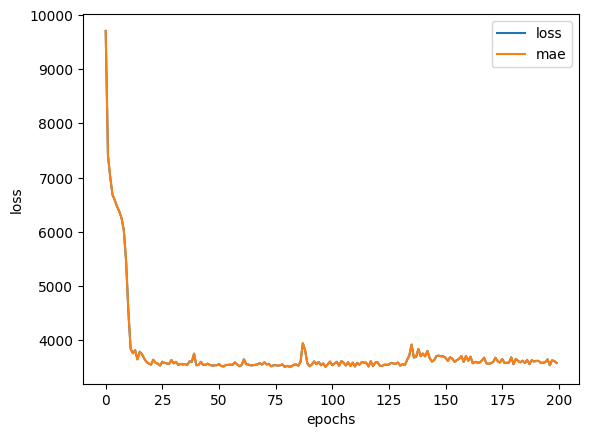

In [58]:
#plot hiatory (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

<h1>Data Preprocessing(Normalization and Standardization)</h1>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
#read in the insurance dataframe
insurance_data  = pd.read_csv('https://raw.githubusercontent.com//stedy//Machine-Learning-with-R-datasets//master//insurance.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [86]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(),['age','bmi','children']),
    (OneHotEncoder(handle_unknown = 'ignore'),['sex' , 'smoker', 'region'])
)
#create x and Y
X = insurance_data.drop(['charges'],axis= 1)
Y = insurance_data['charges']
#Build train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 42)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [87]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [91]:
tf.random.set_seed(42)
model4 = Sequential([Dense(units = 20),
Dense(units = 100),
Dense(units = 10),
Dense(units = 1)])

#compiling
model4.compile(loss = 'mae',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['mae'])
#fitting
history = model4.fit(X_train_normal , Y_train,epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13092.8535 - mae: 13092.8535   
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 8273.0537 - mae: 8273.0537
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 6899.6440 - mae: 6899.6440
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 4830.7412 - mae: 4830.7412
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 3767.0337 - mae: 3767.0337
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 3651.2798 - mae: 3651.2798
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 3690.5994 - mae: 3690.5994
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 3641.6606 - mae: 3641.6606
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 3667.3447 - mae: 3667.3447
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 3701.4136 - mae: 3701.4136
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 3653.9443 - mae: 3653.9443
Epoch 12/100
34/34 ━━━━━━━━

In [88]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [93]:
model4.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 20)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 100)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,085 (39.40 KB)

 Trainable params: 3,361 (13.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,724 (26.27 KB)

In [94]:
model4.evaluate(X_test_normal , Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3324.2178 - mae: 3324.2178 


[3269.3076171875, 3269.3076171875]

<Axes: ylabel='Frequency'>

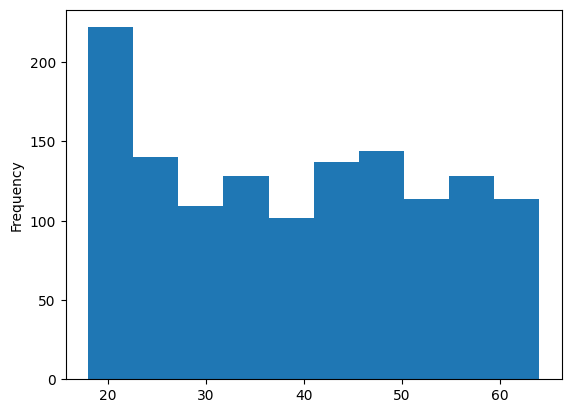

In [71]:
X['age'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

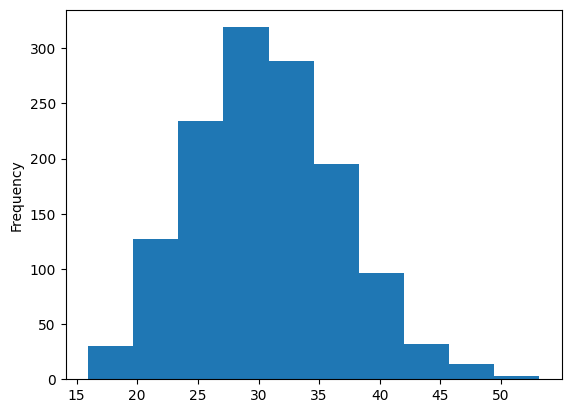

In [72]:
X['bmi'].plot(kind='hist')

In [73]:
X['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64